In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!gdown --id 1E4R21ht_ZM7Rpr2rKtZasvi7Lwy2zDfN

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1E4R21ht_ZM7Rpr2rKtZasvi7Lwy2zDfN
To: /content/verim.csv
100% 6.60k/6.60k [00:00<00:00, 7.37MB/s]


In [3]:
KKDataset = pd.read_csv("verim.csv",sep=",")

In [4]:
KKDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Numara      283 non-null    int64
 1   Cinsiyet    283 non-null    int64
 2   Yas         283 non-null    int64
 3   Gelir       283 non-null    int64
 4   AlimDurumu  283 non-null    int64
dtypes: int64(5)
memory usage: 11.2 KB


In [5]:
print(KKDataset.shape)

(283, 5)


In [6]:
KKDataset.head()

,Numara,Cinsiyet,Yas,Gelir,AlimDurumu
0,15669656,0,31,18000,0
1,15581198,0,31,74000,0
2,15729054,1,27,137000,1
3,15573452,1,21,16000,0
4,15776733,1,28,44000,0


In [7]:
X = KKDataset[["Cinsiyet","Yas","Gelir"]]
y = KKDataset[["AlimDurumu"]]

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=1)

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(226, 3)
(57, 3)
(226, 1)
(57, 1)


In [10]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', random_state=1)

In [11]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [12]:
tahminler = model.predict(x_test)

In [13]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Karmaşıklık Matrisi :")
print(confusion_matrix(y_true=y_test, y_pred = tahminler))
print("Sınıflandırma Raporu :")
print(classification_report (y_true=y_test, y_pred = tahminler))
print("dogruluk degeri :", accuracy_score (y_true=y_test, y_pred = tahminler))

Karmaşıklık Matrisi :
[[41  5]
 [ 4  7]]
Sınıflandırma Raporu :
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        46
           1       0.58      0.64      0.61        11

    accuracy                           0.84        57
   macro avg       0.75      0.76      0.75        57
weighted avg       0.85      0.84      0.84        57

dogruluk degeri : 0.8421052631578947


In [14]:
from sklearn import tree
text_representation = tree.export_text(model)
print(text_representation )

|--- feature_2 <= 89500.00
|   |--- feature_1 <= 46.50
|   |   |--- feature_1 <= 36.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  36.50
|   |   |   |--- feature_2 <= 67500.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  67500.00
|   |   |   |   |--- feature_1 <= 37.50
|   |   |   |   |   |--- feature_2 <= 77500.00
|   |   |   |   |   |   |--- feature_2 <= 70500.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_2 >  70500.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  77500.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  37.50
|   |   |   |   |   |--- feature_1 <= 41.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1 >  41.50
|   |   |   |   |   |   |--- feature_1 <= 43.50
|   |   |   |   |   |   |   |--- feature_2 <= 71500.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_2 >  71500.00
|   |   |   |   |  

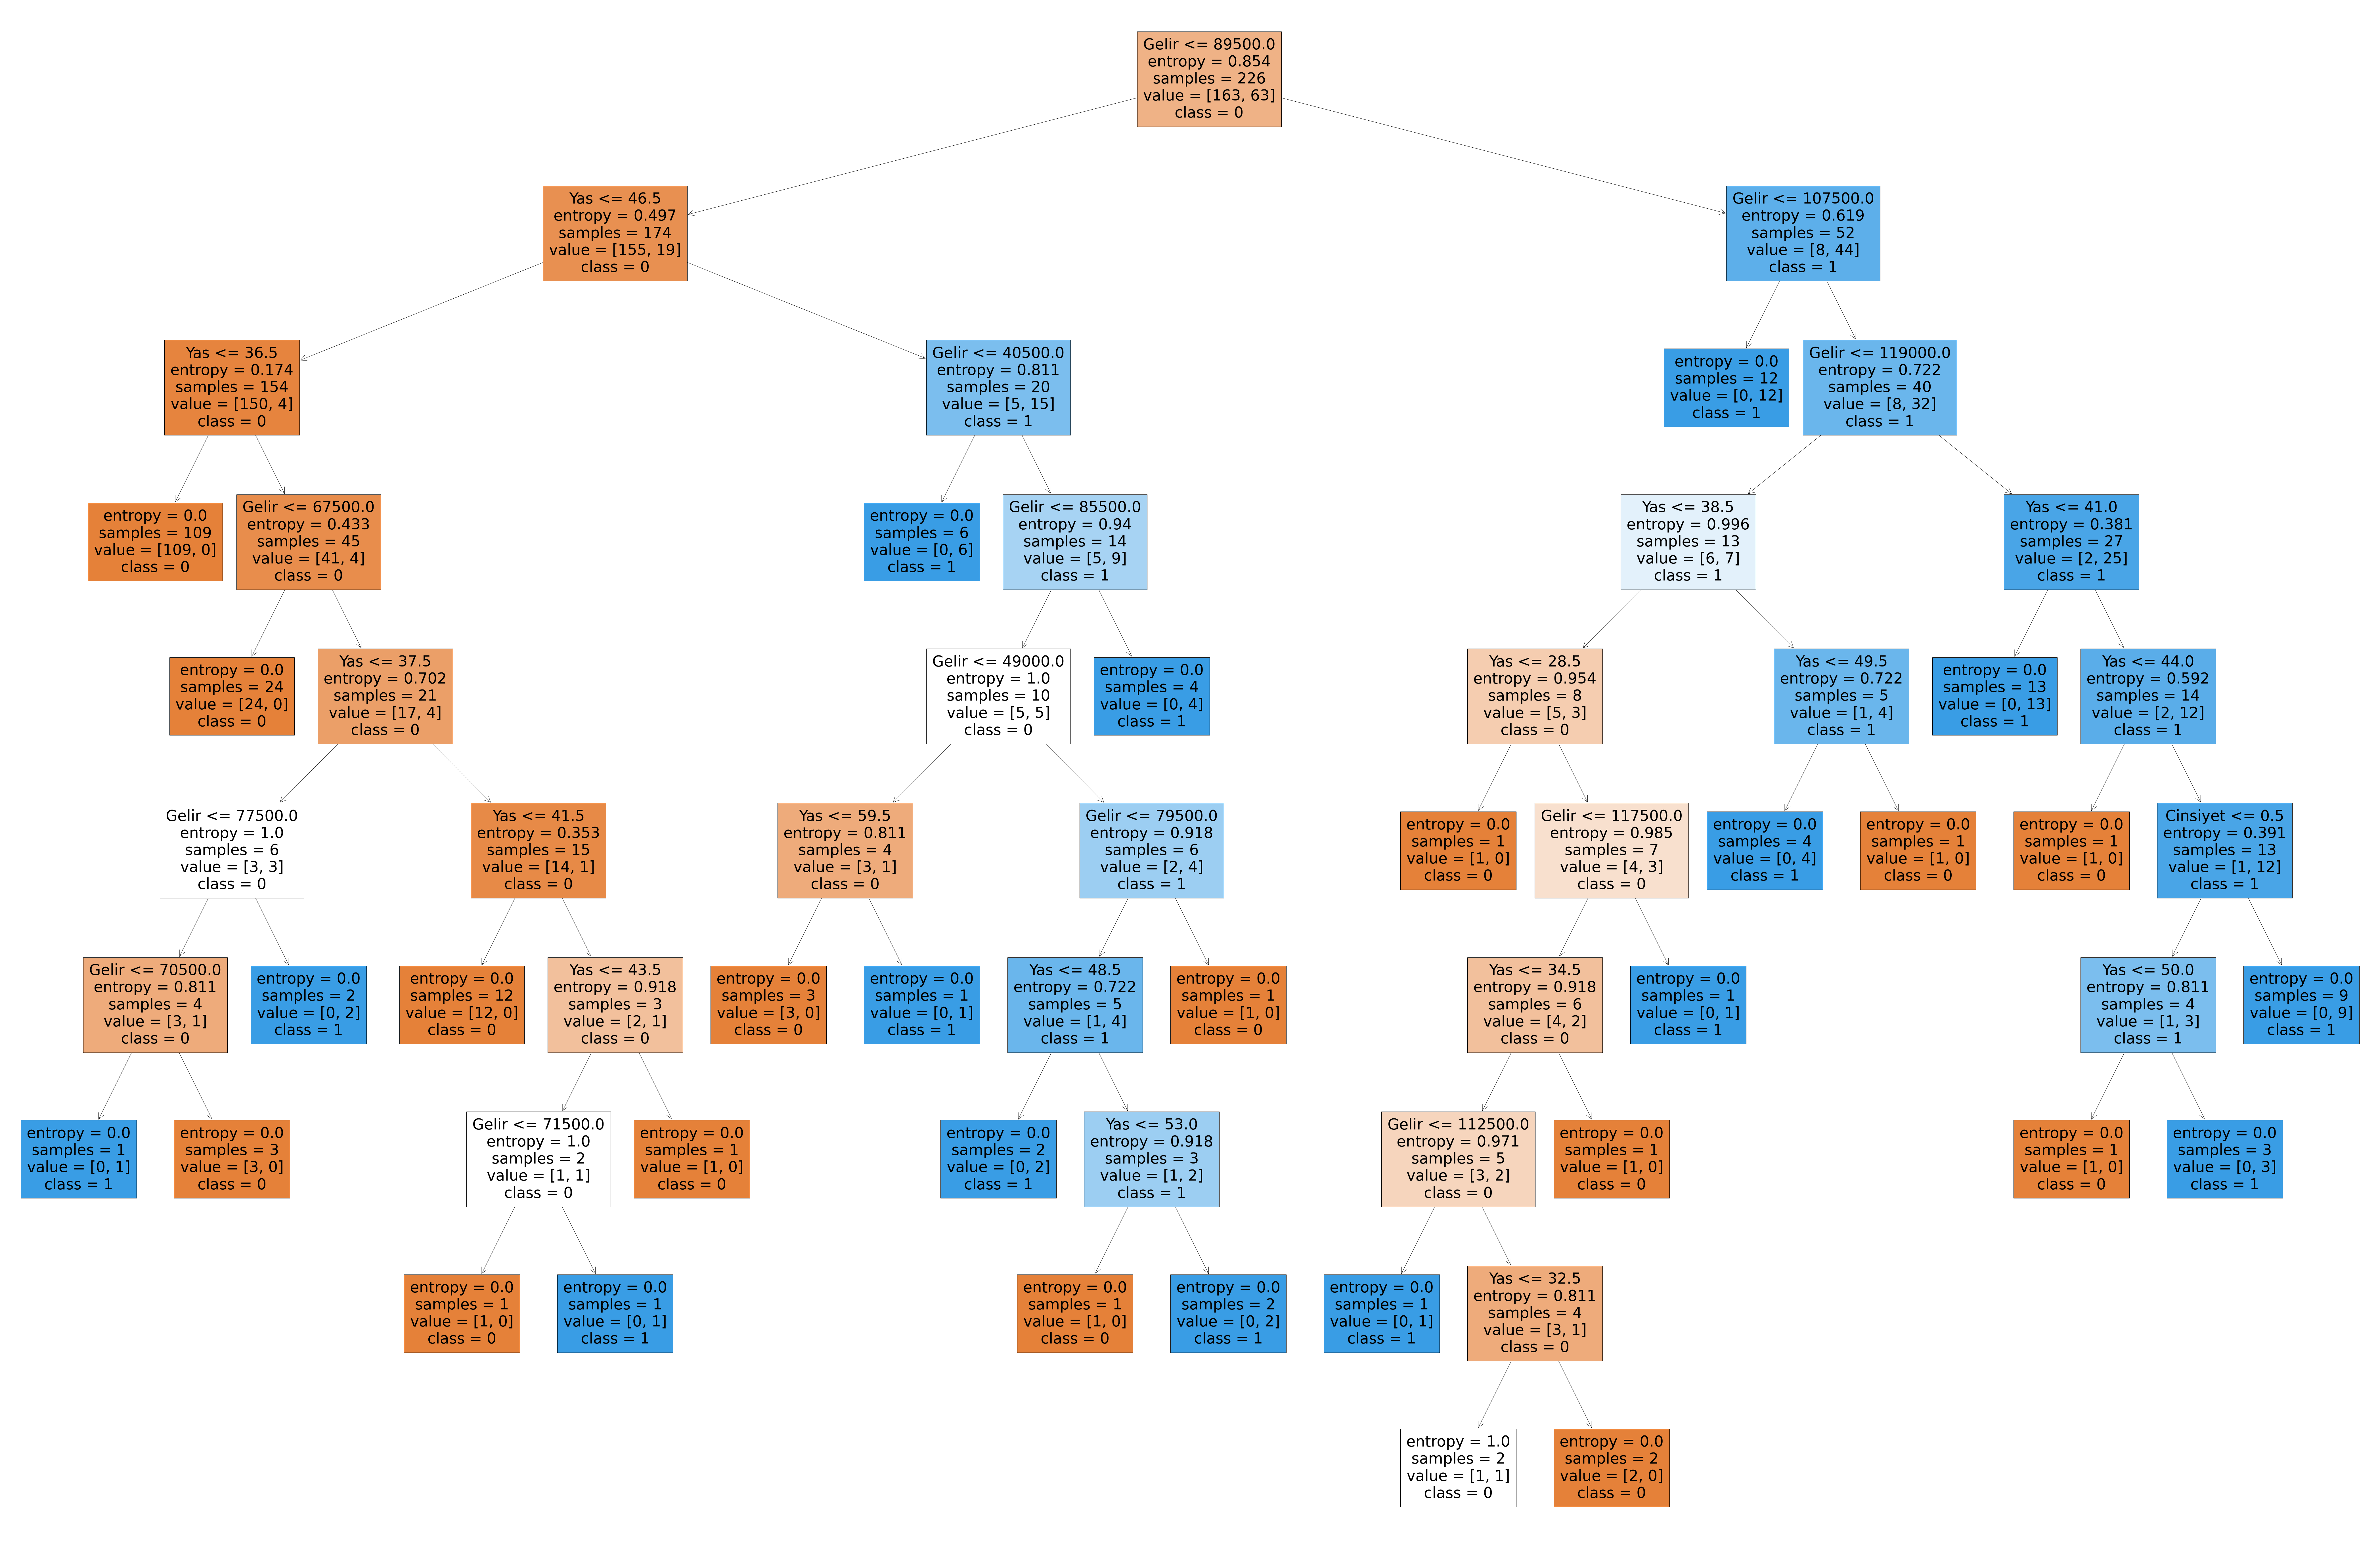

In [15]:
fig = plt.figure(figsize=(150,100))
_= tree.plot_tree(model,
                 feature_names=["Cinsiyet","Yas","Gelir"],
                 class_names=["0","1"],
                 filled=True)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(x_train,y_train)
tahminler - rf_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


array([ 0,  0, -1,  0,  0,  0,  0,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0,  0,
       -1,  1,  0,  0,  0,  0])